<font color='blue' size=30><b><h1>Árvore de Decisão</h1></b></font>

<p>
    Uma árvore de decisão é um modelo de predição utilizado em diversos âmbitos que vão desde a iteligência artificial a economia.
    <br/><br/>
    Dado um conjunto de dados, realiza a construção de diagramas lógicos, que servem para responder e categorizar uma série de condições que ocorrem de forma sucessiva, objetivando a solução de um problema
</p>

<img src='arvore.jpg'>Ávore de Decisão</img>

<h1>Árvore de Decisão: Classificação</h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('vino.csv')
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


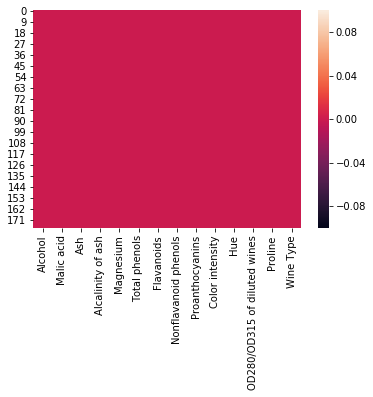

In [5]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null float64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null float64
Wine Type                       178 non-null object
dtypes: float64(13), object(1)
memory usage: 19.5+ KB


In [10]:
df['Wine Type'].unique()

array(['One', 'Two', 'Three'], dtype=object)

In [15]:
df['Wine Type'].value_counts()

Two      71
One      59
Three    48
Name: Wine Type, dtype: int64

In [16]:
X = df.drop('Wine Type', axis=1)
Y = df['Wine Type']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

**Treinando o Modelo**

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
predicao = model.predict(X_test)

In [25]:
print(confusion_matrix(Y_test, predicao))

[[15  0  1]
 [ 0 19  1]
 [ 0  2 16]]


In [26]:
print(classification_report(Y_test, predicao))

              precision    recall  f1-score   support

         One       1.00      0.94      0.97        16
       Three       0.90      0.95      0.93        20
         Two       0.89      0.89      0.89        18

   micro avg       0.93      0.93      0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

